# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


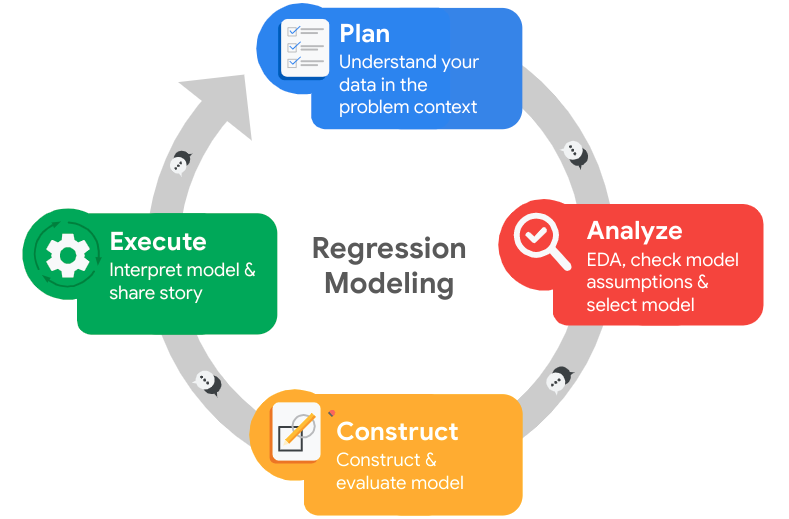

## **Pace: Plan**


In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [23]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# For data modeling
from sklearn.linear_model import LogisticRegression

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.** 

In [24]:

# Load dataset into a dataframe
df0 = pd.read_csv("data\HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()

<>:2: SyntaxWarning: invalid escape sequence '\H'
<>:2: SyntaxWarning: invalid escape sequence '\H'
C:\Users\reasonwhy\AppData\Local\Temp\ipykernel_6908\2407302992.py:2: SyntaxWarning: invalid escape sequence '\H'
  df0 = pd.read_csv("data\HR_capstone_dataset.csv")


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [25]:
# Gathering basic information about the data
print(df0.info())
print('Shape: ', df0.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None
Shape:  (14999, 10)


### Gather descriptive statistics about the data

In [26]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [27]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [28]:
# Rename columns as needed
df0 = df0.rename(columns={'Work_accident':'work_accident',
                          'Department':'department',
                          'average_montly_hours':'average_monthly_hours',
                          'time_spend_company':'tenure'})

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [29]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

There are no missinig values in the data.

### Check duplicates

Check for any duplicate entries in the data.

In [30]:
# Check for duplicates
df0.duplicated().sum()

3008

3008 rows is equivalent of 20% of the whole dataset.

In [31]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


In [66]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep = 'first')

# Display first few rows of new dataframe as needed
print('df1 shape:',df1.shape)
df1.head(10)

df1 shape: (11991, 10)


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

<Figure size 600x1200 with 0 Axes>

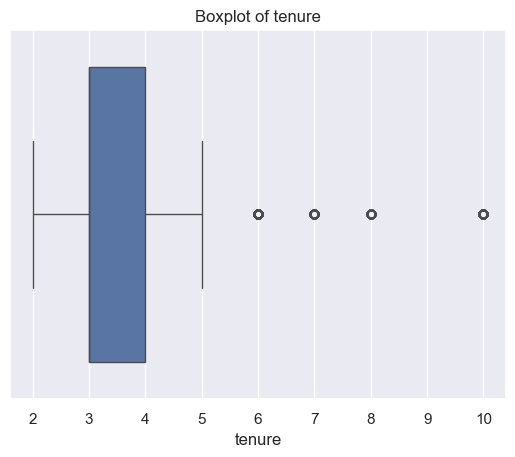

<Figure size 600x1200 with 0 Axes>

In [33]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers

sns.boxplot(x=df1['tenure'])
plt.title('Boxplot of tenure')
plt.figure(figsize=(6,12))

The boxplot above shows that there are outliers in the tenure.

In [34]:
# Determine the number of rows containing outliers

# Compute percentile values in `tenure`
q1 = df1['tenure'].quantile(0.25)
q3 = df1['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = q3 - q1

#Compute lower and upper limits
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr
print('Lower limit:', lower_limit)
print('Upper limit:', upper_limit)

#Identify outliers
outliers = df0[(df0['tenure'] > upper_limit) | (df0['tenure'] < lower_limit)]
print('Number of outliers:', len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of outliers: 824


- Total etries in data set: 11991
- Number of outliers: 824
- Percentage of data entries considered as outliers: (824/11991)x100 = 6.87%

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [35]:
# Numbers of people who left vs. stayed
print(df1['left'].value_counts(), '\n')

# Percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize=True))


left
0    10000
1     1991
Name: count, dtype: int64 

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

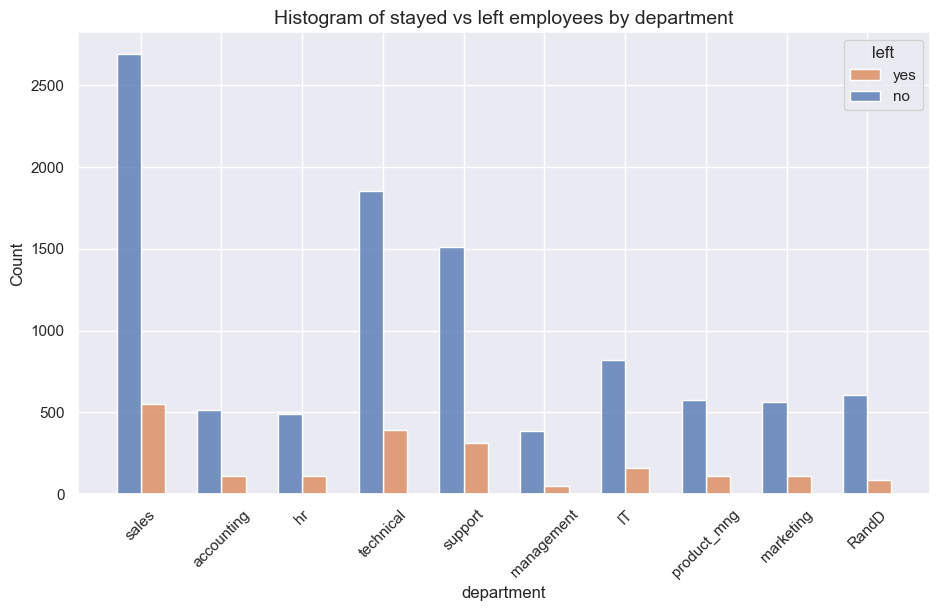

In [36]:
# Histogram of employees that left vs that stayed by department.

plt.figure(figsize = (11, 6))
sns.histplot(data = df1, x = 'department', hue='left', multiple = 'dodge', shrink = .6)
plt.title('Histogram of stayed vs left employees by department', fontsize = 14)
plt.xticks(rotation = 45)
plt.legend(title = 'left', loc = 'upper right', labels = ['yes', 'no'])
plt.show()


Departments doesn't have any notable differences in proportions of emloyees who left compared to those who stayed.

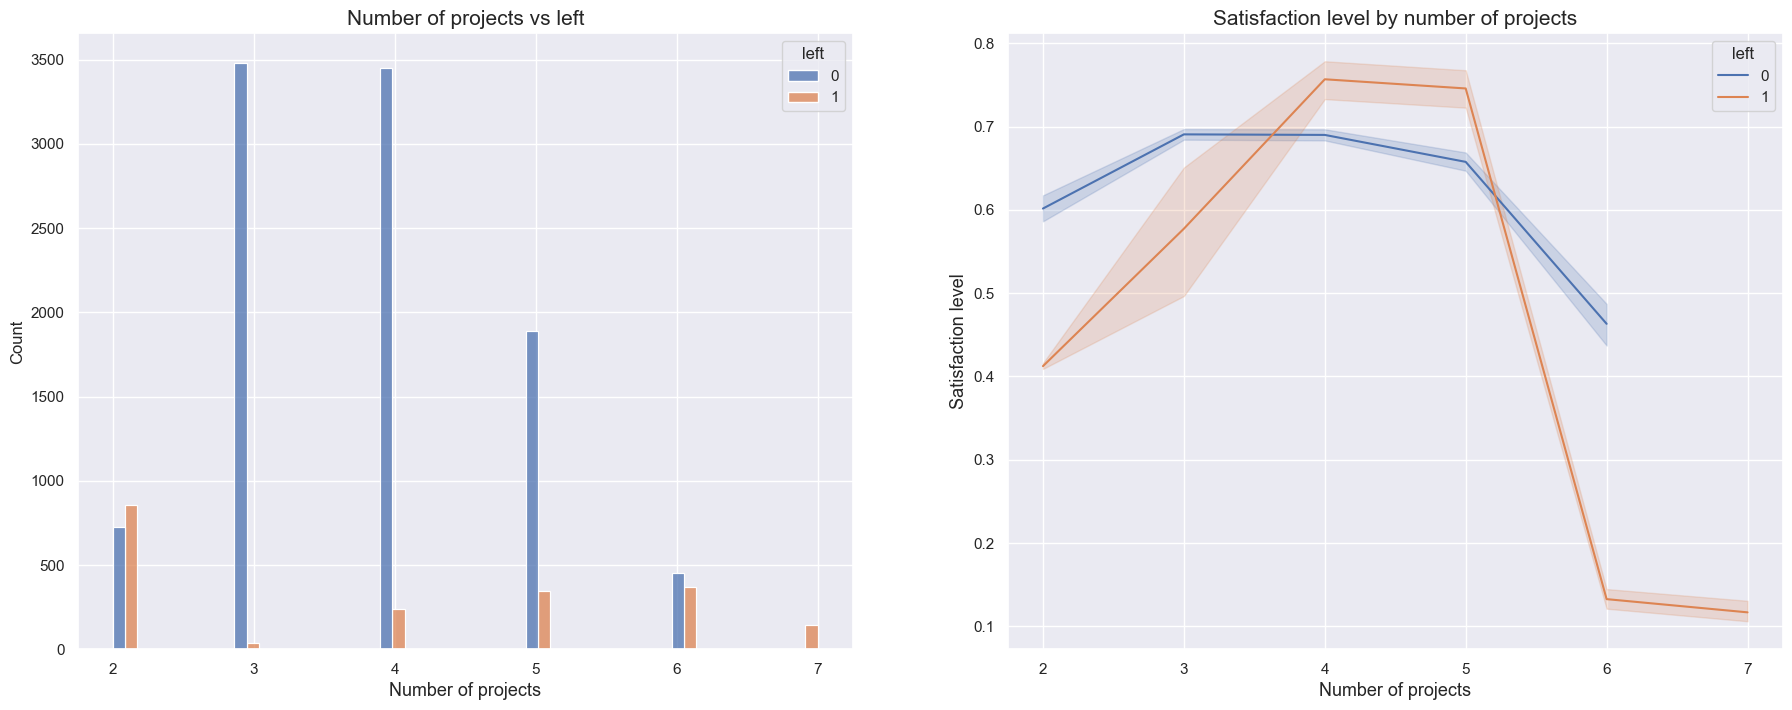

In [70]:
# Number of projects vs left, satisfaction level by number of projects

fig, ax = plt.subplots(1, 2, figsize = (22,8))
sns.histplot(data = df1, x = 'number_project', hue = 'left', multiple = 'dodge',ax = ax[0])
ax[0].set_xlabel('Number of projects', fontsize = '13')
ax[0].set_title('Number of projects vs left', fontsize = '15')

sns.lineplot(data = df1, y = 'satisfaction_level', x = 'number_project', hue = 'left', ax = ax[1])
ax[1].set_xlabel('Number of projects', fontsize = '13')
ax[1].set_ylabel('Satisfaction level', fontsize = '13')
ax[1].set_title('Satisfaction level by number of projects', fontsize = '15')
ax[1].legend(title = 'left')

- Generally, individuals who left were associated with either a lack of projects or were overloaded with projects. Instances where employees left having only two projects can be explained by standard reasons such as resignations when most projects are reassigned during the notice period.
- All individuals handling seven projects left their positions.
- Upon analyzing the line chart, it becomes apparent that the optimal range for satisfaction levels lies within 3 to 5 projects. Both employees who remained and those who left had higher satisfaction levels within this project's range. With six projects or more, the overall satisfaction level experienced a sharp decline.


Text(0.5, 1.0, 'Tenure by number of projects')

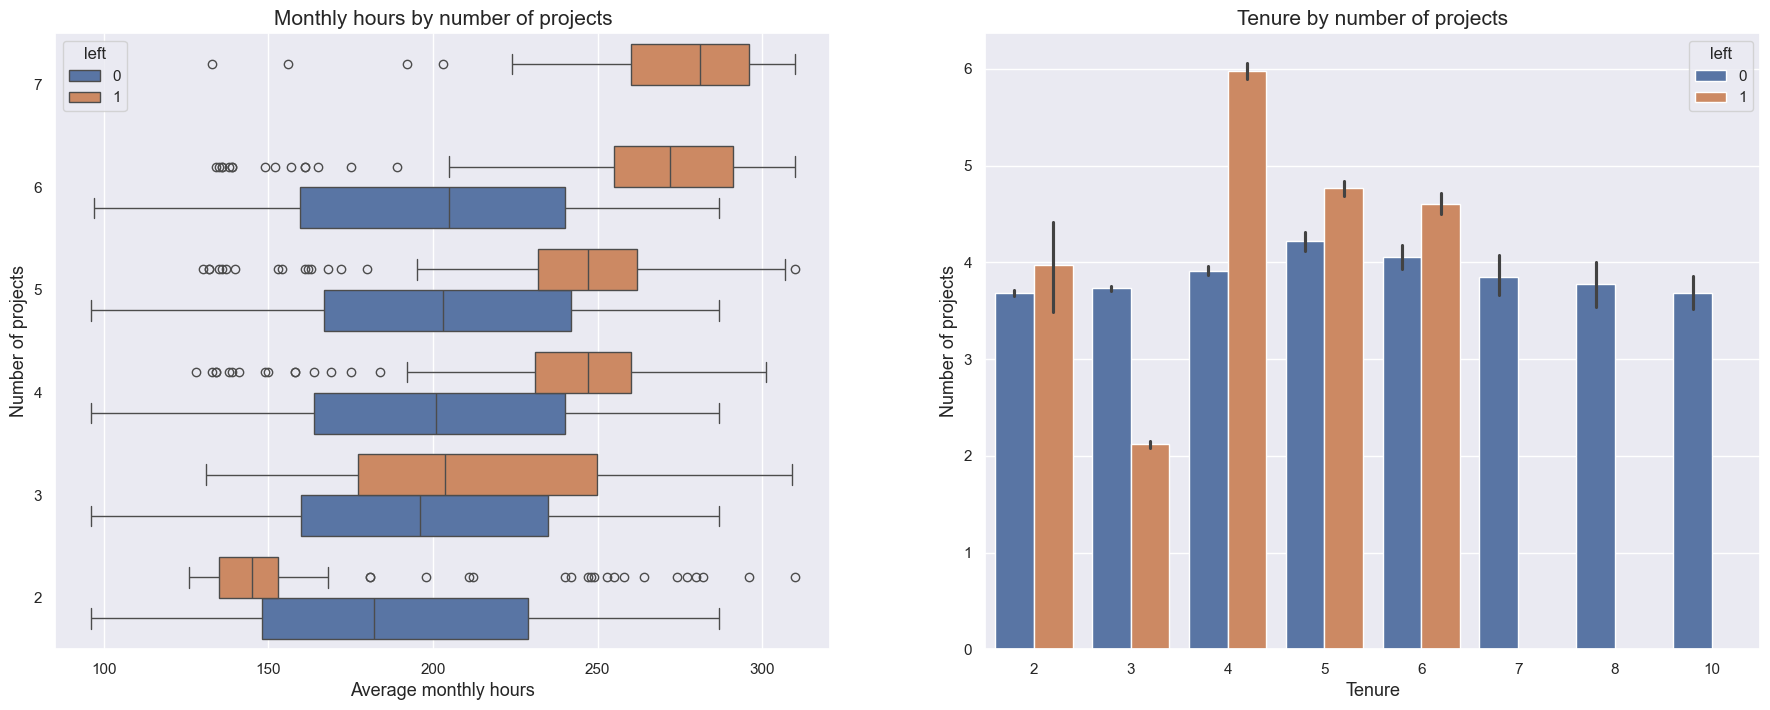

In [38]:
# Monthly hours by number of projects, tenure by number of projects

fig, ax = plt.subplots(1, 2, figsize = (22,8))
sns.boxplot(data = df1, x = 'average_monthly_hours', y = 'number_project', hue = 'left', orient = "h", ax = ax[0])
ax[0].set_xlabel('Average monthly hours', fontsize = '13')
ax[0].set_ylabel('Number of projects', fontsize = '13')
ax[0].set_title('Monthly hours by number of projects', fontsize = '15')
ax[0].invert_yaxis()

sns.barplot(data = df1, x = 'tenure' , y = 'number_project', hue = 'left', ax = ax[1] )
ax[1].set_xlabel('Tenure', fontsize = '13')
ax[1].set_ylabel('Number of projects', fontsize = '13')
ax[1].set_title('Tenure by number of projects', fontsize = '15')

1.  Considering the average workweek to be 40 hours or 166.67 hours per month, it's evident that, except for employees engaged in two projects, every other group is experiencing overwork.

2.  The boxplot validates that employees handling seven projects invariably left the company. The interquartile range of working hours for this group ranged from 255 to 295 hours per month, nearly doubling the average monthly work duration.

3.  A notable trend emerges among departing employees who were involved in more than four projects; they typically had tenure spanning approximately 4 to 6 years. Interestingly, employees with longer tenures (7+ years) demonstrate a retention trend. Investigating this phenomenon further can provide insights into the practices that have retained these employees.

Text(0.5, 1.0, 'Average monthly hours by tenure')

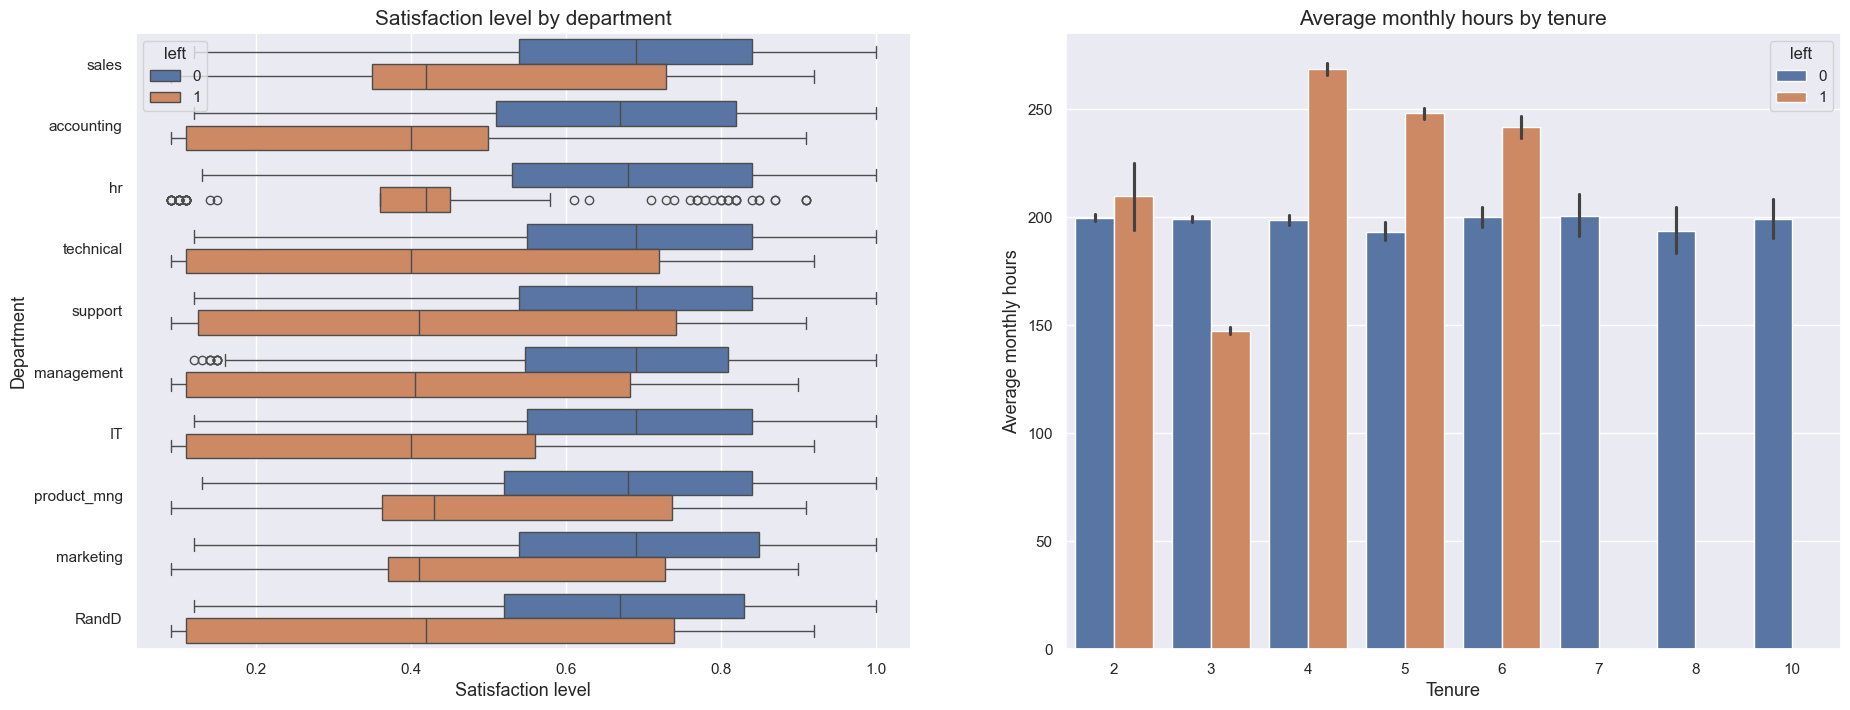

In [39]:
# Satisfaction level by department, average monthly hours vs tenure

fig, ax = plt.subplots(1, 2, figsize = (22,8))
sns.boxplot(data = df1, y = 'department', x = 'satisfaction_level', hue = 'left', orient = "h", ax = ax[0])
ax[0].set_xlabel('Satisfaction level', fontsize = '13')
ax[0].set_ylabel('Department', fontsize = '13')
ax[0].set_title('Satisfaction level by department', fontsize = '15')
ax[0].legend(title = 'left', loc = 'upper left', )

sns.barplot(data = df1, y = 'average_monthly_hours', x = 'tenure', hue = 'left', ax = ax[1])
ax[1].set_xlabel('Tenure', fontsize = '13')
ax[1].set_ylabel('Average monthly hours', fontsize = '13')
ax[1].set_title('Average monthly hours by tenure', fontsize = '15')

 1.   The boxplot depicting satisfaction levels by department illustrates that the average satisfaction among employees who stayed is approximately 0.7, whereas for those who left, it's around 0.4.

 2.   Departments fall into two distinct groups: (A) those with an interquartile range of satisfaction levels among departing employees spanning approximately 0.1 to 0.7, and (B) departments with an interquartile range among departing employees of approximately 0.4 to 0.7. Our analysis shows that employees with lower satisfaction scores in group (A) tend to either work longer hours or handle 5+ projects. Conducting a root cause analysis could unveil the underlying reasons for significant satisfaction differences among these departmental groups.

 3.   The barplot depicting average monthly hours by tenure confirms our findings from the `tenure by number of projects barplot`. Employees with tenures between 4 and 6 years demonstrate the highest average monthly hours and project counts within the left category.

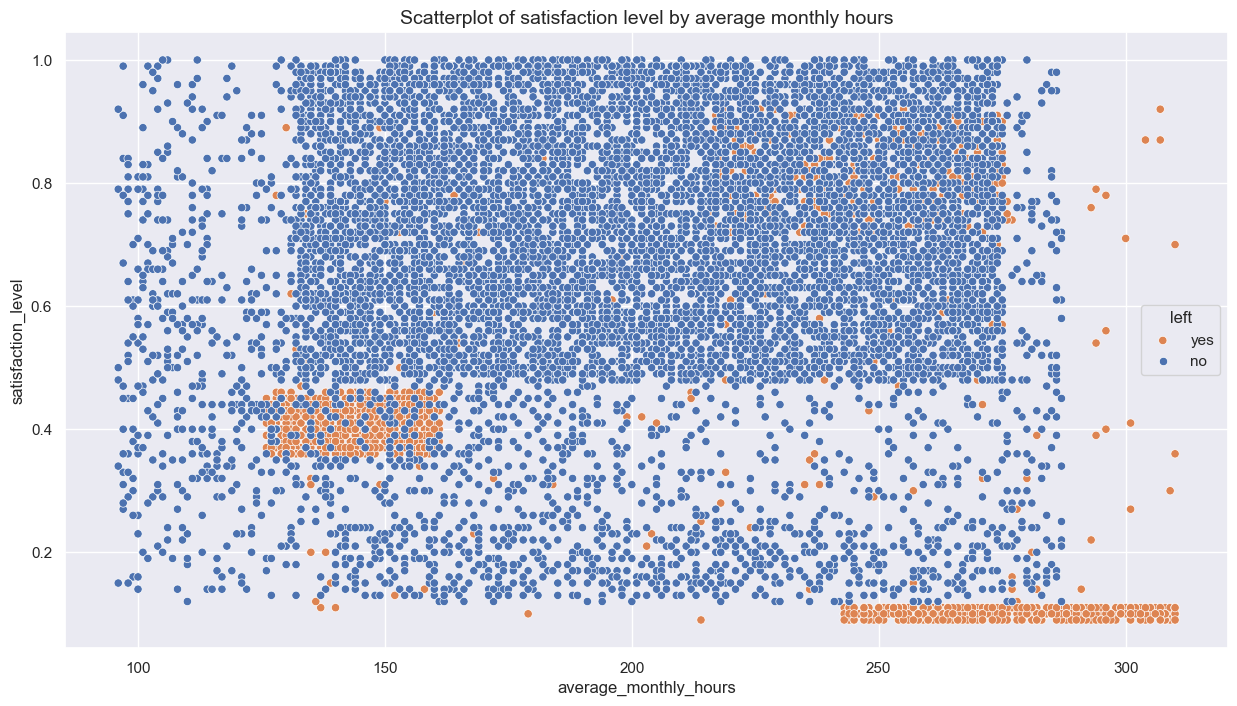

In [40]:
# Satisfaction level vs avg.monthly hours

plt.figure(figsize = (15,8))
sns.scatterplot(data = df1, x = 'average_monthly_hours', y = 'satisfaction_level', hue = 'left')
plt.title('Scatterplot of satisfaction level by average monthly hours', fontsize = '14')
plt.legend(title = 'left',labels = ['yes', 'no'])

 Scatterplot shows three major groups of employees: `(A)` employees that stayed had satisfaction level between ~0.5 - 1.0 and average monthly hours ~145-265, `(B)`employees that left with low average monthly hours ~130 - 160, and satisfaction score ~0.3-0.5, `(C)` employees that left and had low satisfaction score, below 0.2, and highest interquartile range of average monthly hours, 245-310.

Text(0.45, 1.01, 'Facetting histogram of salary by tenure')

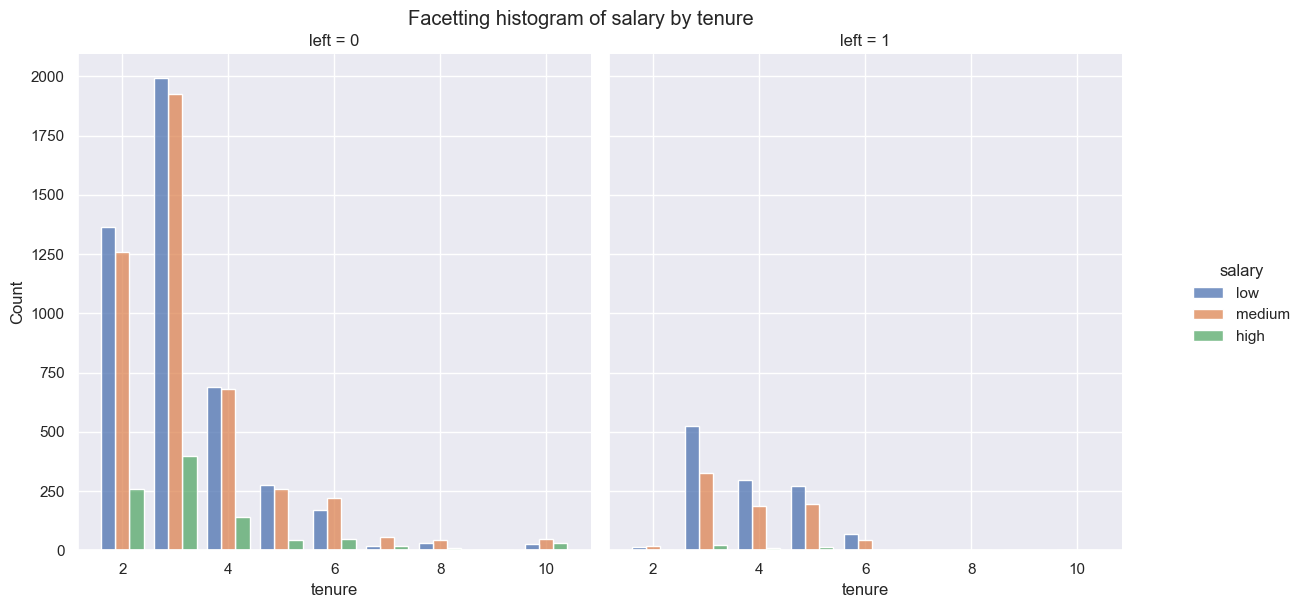

In [60]:
# Salary vs tenure

sns.set_theme(style="darkgrid")
sns.displot(data = df1, x = 'tenure', col = 'left', hue = 'salary', binwidth = 5, height = 6, facet_kws = dict(margin_titles=True),
             multiple = 'dodge', discrete = 2, shrink = .8)
plt.suptitle('Facetting histogram of salary by tenure', y = 1.01, x = 0.45)

1. Employees departing within the 4 to 6 years tenure bracket typically fall within the low to medium salary range. Conversely, individuals with higher salaries demonstrate a tendency to remain within the company. Notably, the majority of employees who left belong to the low salary category. It's plausible that these employees undertake extra projects and extend their working hours in pursuit of promotion or salary increments. Implementing performance-based salary reviews once or twice a year could potentially retain high-performing employees and subsequently enhance the overall satisfaction level.

Text(0.5, 1.0, 'Satisfaction level vs. last evaluation')

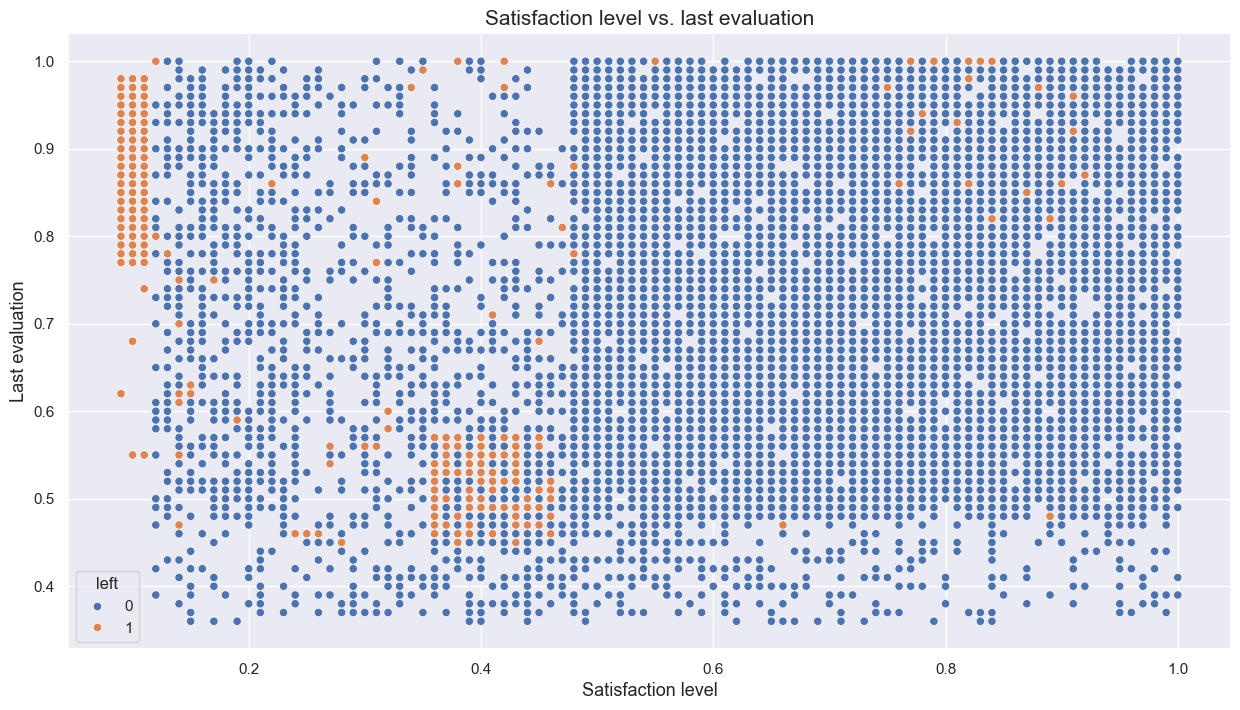

In [68]:
# Satisfaction level vs last evaluation

plt.figure(figsize = (15, 8))
sns.scatterplot(data = df1, x = 'satisfaction_level', y = 'last_evaluation', hue =  'left')
plt.xlabel('Satisfaction level', fontsize = '13')
plt.ylabel('Last evaluation', fontsize = '13')
plt.title('Satisfaction level vs. last evaluation', fontsize = '15')


1. This scatterplot reflects similar finding as in scatterplot `satisfaction level by average monthly hours`.

2. Group of high performing employees will leave regardless of last evaluation score if their overall satisfaction level is too low.

### Insights

It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions, good evaluation scores or pay rise. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave. 

Recommendations:
 1. Set projects limit per employee to 5.
 2. Implement transparent promotion system and performance based salary review
 3. Investigate further departments based on satisfaction level
 4. Investigate long-tenured employees and practices that helps to retain them.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

This tasks involves predicting whether an employee leaves a company. This prediction is categorical variable(left) as the outcome will be yes(1) or no(0), so it is classification.

### Identify the types of models most appropriate for this task.

For categorical prediction most suitable models are: Logistic Regression model.

In [71]:
# Copy the dataframe
df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (df_enc['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


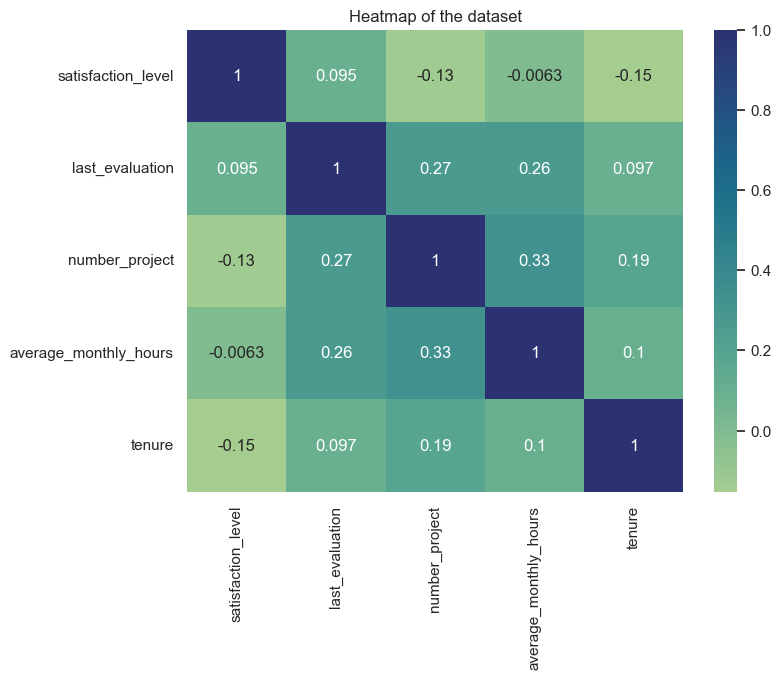

In [65]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

In [49]:
# Removing outliers
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# Display first few rows of new dataframe
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


In [50]:
# Isolate the outcome variable
y = df_logreg['left']

# Display first few rows of the outcome variable
y.head() 

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [51]:
# Select the features you want to use in your model
X = df_logreg.drop('left', axis=1)

# Display the first few rows of the selected features 
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,0,0,False,False,False,False,False,False,False,True,False,False


In [52]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [53]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [54]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

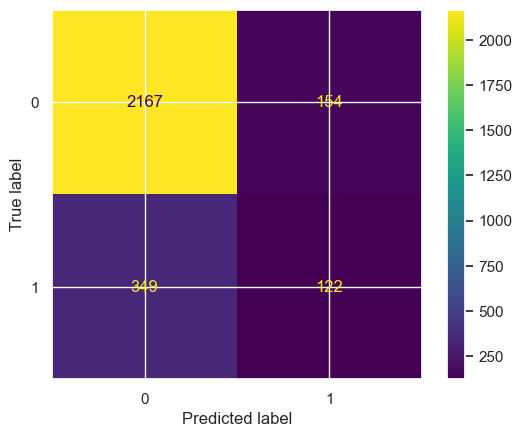

In [55]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

In [56]:
df_logreg['left'].value_counts(normalize=True)

left
0    0.831468
1    0.168532
Name: proportion, dtype: float64

In [57]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



The classification report shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. However, if it's most important to predict employees who leave, then the scores are significantly lower.

The logistic regression model achieved precision of 80%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83%, on the test set.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

#### Logistic Regression

The logistic regression model achieved precision of 80%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83%, on the test set.


### Conclusion, Recommendations, Next Steps

The model and the feature importances extracted from the models confirm that employees at the company are overworked.

To retain employees, the following recommendations could be presented to the stakeholders:

   1. Cap the number of projects that employees can work on from 3 to 5.
   2. Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied.
   3. Either reward employees for working longer hours, or don't require them to do so.
   4. If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear.
   5. Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts.
   6. High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort.
   7. Implement performance based salary review.
   8. Investigate further departments based on satisfaction level
   9. Investigate long-tenured employees and practices that helps to retain them.